In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset B: Missing Labels and Duplicated Observations

In [2]:
df = pd.read_csv('../Data/B_Relabelled.csv', index_col=0)
df.head()

,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,Fea7,Fea8,Fea9,Fea10,...,Fea492,Fea493,Fea494,Fea495,Fea496,Fea497,Fea498,Fea499,Fea500,classification
Sample1,0.0,0.0,0.0,0.0,3.091042,0.0,1.609438,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN
Sample2,0.0,0.0,0.0,0.0,4.615121,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,2.639057,0.0,0.0,0.0,0.0,2.197225,NaN
Sample3,0.0,0.0,0.0,0.0,2.079442,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,4.317488,0.0,0.0,0.0,0.0,0.000000,NaN
Sample4,0.0,0.0,0.0,0.0,4.369448,0.0,0.000000,0.0,0.0,0.693147,...,0.000000,0.693147,0.0,4.762174,0.0,0.0,0.0,0.0,1.791759,NaN
Sample5,0.0,0.0,0.0,0.0,4.615121,0.0,0.000000,0.0,0.0,0.000000,...,2.397895,0.000000,0.0,2.484907,0.0,0.0,0.0,0.0,0.000000,NaN


(a) Summarise the frequency of the labels in the dataset, and display this information as a table in your report.

In [3]:
freq = np.unique(df['classification'].values, return_counts=True)
print(freq)

counts = freq[1]
print(counts / np.sum(counts) * 100)

(array([ 1.,  2.,  4., nan]), array([179, 157,  72,  20]))
[41.82242991 36.68224299 16.82242991  4.6728972 ]


Classification	Count
1.0		179
2.0		157
4.0		72
nan		20


Text(0.5, 1.0, 'Number of Samples for Each Classification')

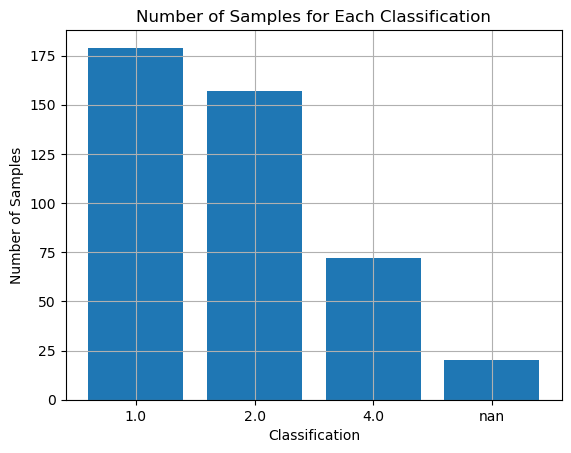

In [4]:
labels = df['classification'].values

# Get the number of samples for each classification
unique_labels = np.unique(labels)
counts = []
for label in unique_labels:
    counts.append(np.sum(labels == label))
    
# For some reason, NaNs are not counted above
counts[-1] = np.sum(np.isnan(labels))

# Display info in table
print('Classification\tCount')
for i in range(len(unique_labels)):
    print('{}\t\t{}'.format(unique_labels[i], counts[i]))

# Plot the number of samples for each classification
plt.bar([str(x) for x in unique_labels], counts)
plt.grid(True)
plt.xlabel('Classification')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Classification')

(b) Identify duplicated observations (which may or may not have been mislabelled). In your report, state these duplicate observations and explain a strategy that you could take to address this. Implement this process in your code.

In [5]:
# Get features
features = df.iloc[:, :-1]  # ignore labels ("may have been mislabelled")

# Get duplicates from features
duplicates = features[features.duplicated()]
duplicates

,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,Fea7,Fea8,Fea9,Fea10,...,Fea491,Fea492,Fea493,Fea494,Fea495,Fea496,Fea497,Fea498,Fea499,Fea500
Sample101,0.000000,0.693147,0.0,0.000000,4.875197,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,2.302585,0.000000,0.000000,4.110874,0.0,0.0,0.0,0.000000,0.000000
Sample107,0.000000,1.098612,0.0,0.000000,5.056246,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,3.931826,0.0,0.0,0.0,0.000000,1.386294
Sample146,0.000000,0.000000,0.0,0.000000,3.912023,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.945910,0.0,0.0,0.0,0.000000,0.000000
Sample173,0.000000,0.000000,0.0,0.693147,5.023881,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.693147,0.000000,2.772589,4.007333,0.0,0.0,0.0,0.000000,2.484907
Sample193,0.000000,0.000000,0.0,0.000000,4.189655,0.000000,0.000000,0.0,0.000000,0.693147,...,0.0,0.000000,1.098612,0.000000,1.386294,0.0,0.0,0.0,0.000000,2.302585
Sample198,0.000000,0.000000,0.0,0.000000,4.430817,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,3.258097,2.197225,0.0,0.0,0.0,0.000000,0.000000
Sample249,0.000000,0.000000,0.0,0.000000,4.418841,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,4.859812,0.0,0.0,0.0,0.000000,1.609438
Sample253,0.000000,0.000000,0.0,0.000000,4.262680,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.693147,0.000000,3.433987,0.0,0.0,0.0,0.000000,0.000000
Sample260,0.000000,0.000000,0.0,0.000000,4.330733,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.0,1.945910,0.000000
Sample291,0.000000,0.000000,0.0,0.000000,3.951244,0.000000,0.000000,0.0,1.791759,0.000000,...,0.0,0.000000,0.000000,0.000000,2.708050,0.0,0.0,0.0,0.000000,2.708050


In [6]:
print(f'Shape before dropping: {df.shape}')

# Drop duplicates regardless of classification
df.drop_duplicates(subset=df.columns[:-1], inplace=True)

print(f'Shape after dropping: {df.shape}')

Shape before dropping: (428, 501)
Shape after dropping: (408, 501)


(c) In your report, briefly describe two approaches for handling observations with missing labels, and outline the pros and cons for each. Briefly mention the different between missing at random (MAR) and missing not at random (MNAR).

**Approach 1: Delete missing data**

Pros:
- Easy to implement

Cons:
- Reduces sample size, potentially losing valuable information
- If data is not missing at random, may introduce bias

**Aproach 2: Impute missing data**

Pros:
- Maximises use of available data
- Could reduce bias

Cons:
- Choice of imputation method may introduce bias


Missing at Random (MAR): The probability of a value being missing depends on the observed values, but not on the missing values themselves.

Missing not at Random (MNAR): The probability of a value being missing depends on the missing values themselves.

(d) For observations without missing data, predict the classification labels using the multinomial logistic regression or k-nearest neighbours. Use this model to predict the missing labels. Recalculate the overall summary of labels and compare this to the original summary.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Train set is that without missing data
train = df[~np.isnan(df['classification'])]

# Get data with missing labels
to_predict = df[np.isnan(df['classification'])]
X_to_predict = to_predict.iloc[:, :-1]

# Get X and y for training
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [9]:
from sklearn.model_selection import GridSearchCV
import pickle

def perform_grid_search(filename, model, params):
    grid = None
    filepath = f'../Data/pickles/{filename}.pickle'
    try:
        with open(filepath, 'rb') as f:
            print(f'Found {filename} pickle file. Loading...', end='\r')
            grid = pickle.load(f)
    except FileNotFoundError:
        print(f'Could not find {filename} pickle file. Training...', end='\r')
        grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid.fit(X_train, y_train)
        pickle.dump(grid, open(filepath, 'wb'))
        
    print(f'{filename} Best Score: {grid.best_score_}')
    print(f'{filename} Best Params: {grid.best_params_}')
    print()
    return grid

# Logistic Regression
logreg_params = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 20),
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'multi_class': ['multinomial'],
    'n_jobs': [-1],
    'max_iter': [1000],
}
logreg_grid = perform_grid_search('Q2d_logreg_grid', LogisticRegression(), logreg_params)

# KNN
knn_params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'n_jobs': [-1],
}
knn_grid = perform_grid_search('Q2d_knn_grid', KNeighborsClassifier(), knn_params)


Q2d_logreg_grid Best Score: 0.8324009324009325
Q2d_logreg_grid Best Params: {'C': 0.0018329807108324356, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}

Q2d_knn_grid Best Score: 0.6882450882450882
Q2d_knn_grid Best Params: {'n_jobs': -1, 'n_neighbors': 12, 'weights': 'distance'}



In [10]:
# Multinomial Logistic Regression was best
model = LogisticRegression(**logreg_grid.best_params_)

# Train model
model.fit(X_train, y_train)

# Predict missing labels
labels_pred = model.predict(X_to_predict)

# Summarise predictions distributions
print('Predicted Labels')
print(np.unique(labels_pred, return_counts=True))

Predicted Labels
(array([1., 2., 4.]), array([8, 8, 4]))


In [11]:
current = np.unique(labels, return_counts=True)
current

(array([ 1.,  2.,  4., nan]), array([179, 157,  72,  20]))

In [12]:
current_counts = current[1][:-1]
pred_counts = np.unique(labels_pred, return_counts=True)[1]

# New counts:
new_counts = current_counts + pred_counts
new_counts

array([187, 165,  76])

In [13]:
print('Proportions before:')
print(current_counts / np.sum(current_counts))

print('\nProportions after:')
print(new_counts / np.sum(new_counts))

Proportions before:
[0.43872549 0.38480392 0.17647059]

Proportions after:
[0.43691589 0.38551402 0.17757009]
